# Machine Learning Examples
### Lang Qin
- This demonstration will cover 3 machine learning algorithms: **RidgeClassifier, RandomForestClassifier, KNeighborsClassifier.**

## Data Preparation
Suppose we are going to predict the magnitude of the wildfire based on climate factors, and there is a data set containing a large number of recorded wildfire cases in the U.S.. 


Before we do real stuff on algorithms, we must prepare our data. Let's first take a look at our data set. 

In [67]:
import pandas as pd

file_directory = '/Users/langqin/Documents/Microsoft Intern/Task 1/FW_Veg_Rem_Combined.csv'

raw = pd.read_csv(file_directory)
# preview the top 5 rows of the dataset
raw.head()

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


Observing the data sets, we see some irrelavant information in the front and serveral factors that correlated to the magnitude of the wilrawire. What we do next is to extract the valuable information. <br>

In the U.S., California is the state "known" for wildfires. Since the magintude of wildfires is closely related to environmental and geographical factors, let's focus on cases in California. <br>

Since our goal is to predict the magnitude of the wilrawire based on whether conditions, then we select columns named `fire_size`, `fire_size_class`, and columns of name with `Temp`, `Wind`, `Hum`, `Prec`. However, bearing the fact that wildfire tends to accumulate around places such as california 

In [68]:
# select the columns
raw = raw.loc[raw['state']=='CA']

frames = [raw['fire_size'], raw['fire_size_class'], raw.loc[:, 'Temp_pre_30':'Prec_cont']]
# purify the data set with only selected columns
raw = pd.concat(frames, axis=1)
raw

,fire_size,fire_size_class,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont
78,450.0,E,27.850483,28.165097,28.499405,33.900000,2.580000,2.664543,2.769643,2.237500,44.706207,42.983379,49.000000,39.375000,0.0,0.0,0.0,0.0
88,3.0,B,19.685119,19.242174,19.495294,19.063744,3.893413,3.755263,3.401190,3.751422,67.688935,68.160550,64.461538,66.811705,0.0,0.0,0.0,0.0
93,1.0,B,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
123,3.0,B,33.901235,35.444444,35.107143,34.500000,4.684711,4.325000,4.509091,4.572222,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
159,200.0,D,23.892857,22.357143,21.400000,22.444444,1.303571,1.092857,2.040000,1.140741,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55354,4000.0,F,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
55363,70868.0,G,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
55364,5702.0,G,28.425403,28.425403,28.166667,27.646067,2.649395,2.649395,2.667722,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0
55365,3261.0,F,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0


Let's take a closer look at the data. In row 4, there are `-1`s. This means the corresponding information is missing. So, how much such information is missing? We use `seaborn` and `numpy` to visualize it.

[Text(0.5, 1.0, 'Specify Missing Data')]

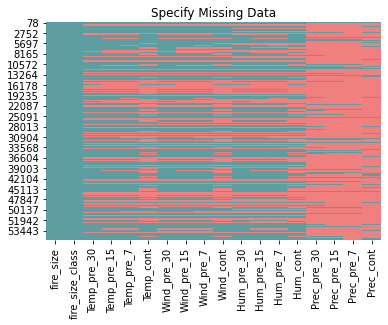

In [69]:
import seaborn as sns
import numpy as np

# replace all 0 or -1 by NaN
raw = raw.replace(0, np.nan)
raw = raw.replace(-1, np.nan)
# plot the heat map
cols = raw.columns[:18]
colours = ['cadetblue', 'lightcoral']
sns.heatmap(raw[cols].isnull(), cmap=sns.color_palette(colours), 
            cbar=False).set(title='Specify Missing Data')

Since there are a lot of missing data in precipitation aspect, we ignore this factor. In addition, to extract as most and relative information as possible, we choose to focus on indices 7 days prior to the wildfire.

In [70]:
select_col = [raw['fire_size'], raw['fire_size_class'], raw['Temp_pre_7'], 
              raw['Wind_pre_7'], raw['Hum_pre_7']]

# drop all rows with NaN
df = pd.concat(select_col, axis=1).dropna().reset_index()

# view current data set
df

,index,fire_size,fire_size_class,Temp_pre_7,Wind_pre_7,Hum_pre_7
0,78,450.0,E,28.499405,2.769643,49.000000
1,88,3.0,B,19.495294,3.401190,64.461538
2,192,1.0,B,15.781065,1.110355,58.560897
3,267,1.0,B,4.586826,0.650699,63.141717
4,274,1.3,B,17.417453,2.402830,50.336788
...,...,...,...,...,...,...
2457,55197,6533.0,G,4.676829,2.454878,42.447154
2458,55198,8051.0,G,26.402381,3.169643,45.226190
2459,55199,10570.0,G,21.403933,2.075000,33.509202
2460,55364,5702.0,G,28.166667,2.667722,44.443975


Now our data set is cleaned. The next step is to choose the algorithms. Notice that the range of the numerical indicator of the magnitude of the wildfires `fire_size` is **very large**: [1.0, 760671.0]. However, our variance of climate indicators are comparatively **very small**. Thus, to determine the numerical magnitude (`fire_size`) through regression is not a wise choice. Otherwise, we need to "magnify" the very small amount of changes in climate indicators to describe the variations in `fire_size`.<br>

Hence, we turn to classifications. Here, we do three classification models: **RidgeClassifier, RandomForestClassifier, KNeighborsClassifier.** <br>

## Train the Models

Here is the most important rule in all of machine learning: **You need to set aside some data that you never look at while training to assess how your model will do in the future.**

Because this is so important, `sklearn` provides a function called `train_test_split` to break your dataset up (randomly) into a training set and test set. The cell below shows how to call it.

In [71]:
from sklearn.model_selection import train_test_split

# select our features (factors) and labels (the one to be predicted)
features = df.loc[:, 'Temp_pre_7':'Hum_pre_7']
labels = df['fire_size_class']

# take 0.8 of our data to train the model, 0.2 to test
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2)

# Print the number of training examples and the number of testing examples
print(len(features_train), len(features_test))

1969 493


### **KNeighborsClassifier**
Now we first look at KNeiborsClassifier.
> 

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(features_train,labels_train)

#check accuracy of our model on the test data
knn.score(features_test, labels_test)

0.5963488843813387

Our accuracy is about 0.60, which is not very good. Let's play with the parameter `n_neighbors` to see if there will be any changes.

0.6531440162271805

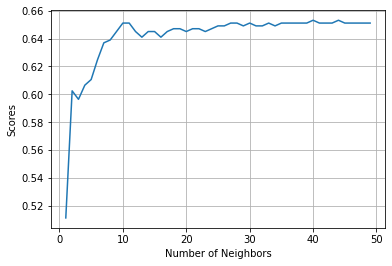

In [73]:
# define the function that fit the model and test the accuracy
def kneibor(num):
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(features_train,labels_train)
    return knn.score(features_test, labels_test)


# test serveral number of neighbors
scores = []
for i in range(1, 50):
    scores.append(kneibor(i))

## plot the scores v.s. number of neighbors
import matplotlib.pyplot as plt

# plot the plain graph
plt.plot(range(1, 50), scores)

plt.grid()  # add grid
plt.xlabel("Number of Neighbors")   # add xlabel
plt.ylabel("Scores")    # add ylabel

# print the highest score
max(scores)

From the above graph, we notice that our model is improving as `n_neighbors` increases. Then, it would be very nice if we play with the parameters when we do machine learning, which is called tuning. The accuracy score reaches the highest and stabilize for `n_neighbors >= 40` at around 0.65.<br> 

Apart from the parameter, is there any other way to improve our model? Of course, we will use **k-Fold Cross-Validation** to see if any improvement.

In [74]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=40)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, features, labels, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.65858586 0.65991903 0.66191446 0.66395112 0.66395112]
cv_scores mean:0.6616643175073875


With Cross-Validation, we find our average score higher than the highest score of KNeibor it self. This has shown that **k-Fold Cross-Validation** is an improvement.

Wait, the parameter `n_neighbors` we used is 40, unchanged for 5 cross validations. Don't forget our first method to "tune" the model is to play with `n_neighbors`. Now, we do it again, and it is called **Hyper Tuning**.

In [75]:
from sklearn.model_selection import GridSearchCV

# create a new KNeighborClassifier model
knn_new = KNeighborsClassifier()

# create a dictionary of values to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
# We choose 5 to 50 because our previous trials show the trend that our accuracy will increase as n_neighbors grows.

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_new, param_grid, cv=5)

# train the model
knn_gscv.fit(features, labels)

# find the top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 34}

Great, we obtain a different value of `n_neighbors = 34` than `40`. What about its performance?  

In [76]:
# find the average accuracy for the top performing value of n_neighbors
knn_gscv.best_score_

0.6620633631194152

Well, well, well. The overall performance seems unchanged, only merely 0.01 improvement. So, we might ask: whether or not KNeighborClassifer is suitable for this data set? Let's try another algorithm. <br>

### **RandomForestClassifier**

In [77]:
from sklearn.ensemble import RandomForestClassifier

# import the library to compute the accuracy (another way)
from sklearn import metrics

# initialize the model
clf = RandomForestClassifier(n_estimators=100)

# train the model
clf.fit(features_train, labels_train)

# use the model to predict based on features_test
pred = clf.predict(features_test)

# compute the accuracy
print("Test Score", metrics.accuracy_score(labels_test, pred))

Test Score 0.6531440162271805


Our first trail with default settings gives accuracy of 0.64. It is more all less the same as kNeighborClassifier. Lets' try to see how can we tune the model. If we take a closer look at the initilizer of the model, we will see

In [78]:
print(clf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Yes, there are a huge amount of paraemeters we could play with. In this example, we will focuse on these ones:
- n_estimators: number of trees in the foreset,
- max_features: max number of features considered for splitting a node,
- max_depth: max number of levels in each decision tree,
- min_samples_split: min number of data points placed in a node before the node is split,
- min_samples_leaf: min number of data points allowed in a leaf node,
- bootstrap: method for sampling data points (with or without replacement). <br>

But, there are still so many of them. Don't worry! Don't forget something called **Cross Validation** we used in previous cells. We will use this fantasitic tool to **hyper tune** the model again. 



In [79]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = range(100, 2001, 10)

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = range(10, 111, 10)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# method of selecting samples for training each tree
bootstrap = [True, False]

# combine the above settings into the one so called the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Note: the official website of RandomForest Classifier provdies detailed explanation on the funciton of each parameter: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

{'n_estimators': range(100, 2001, 10), 'max_features': ['auto', 'sqrt'], 'max_depth': range(10, 111, 10), 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


Per iteration, the algorithm will choose a difference combination of these paremeters. To sum up, there are 19 * 2 * 10 * 4 * 4 * 2 = 12,160 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values. Let's do it!

In [80]:
# initilize the model to be tuned
rf = RandomForestClassifier()

# random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# train the random search model
rf_random.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

Wow, that indeed takes some time to do such big amount of work. <br>

Here we will introduce two most important parameters in RandomizedSearchCV:
- `n_iter`: controls the number of different combinations to try (we used 100)
- `cv`: the number of folds to use for cross validation (we used 3) <br>

As we see, the more wider the search tree was, the more time it will take to complete the task. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental. <br>

Lets' see what we got here! 

In [81]:
# show the best choice
rf_random.best_params_

{'n_estimators': 520,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [82]:
# show the best accuracy
rf_random.best_score_

0.6714068054850177

Now, we obtain our best RandomForest Classifier of accuracy = 0.67 with a 0.03 increase. But, don't forget that is our score on the training data. How about our testing data?

In [83]:
# choose the optimized model from above trails
rf_opt = rf_random.best_estimator_

# accuracy on test data
print("Test Score:", metrics.accuracy_score(labels_test, rf_opt.predict(features_test)))

Test Score: 0.6511156186612576


Humm, it seems nonthing has changed. It is likely that our algorithm is not an expert dealing with our data. What about another algorithm? <br>

### **RidgeClassifier**

Similarly, we will first do the very basic example.

In [84]:
from sklearn.linear_model import RidgeClassifier

# initialize the model
rc = RidgeClassifier()

# preview the parameters of the model
print(rc)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)


In [85]:
# train the model
rc.fit(features_train, labels_train)

# accuracy based on trainning data
score = rc.score(features_train, labels_train)
print("Train Score: ", score)

# cross-validated accuracy based on trainning data
cv_scores = cross_val_score(rc, features_train, labels_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

# prediction accuracy
print("Test Score: ", rc.score(features_test, labels_test))

Train Score:  0.664804469273743
CV average score: 0.66
Test Score:  0.6511156186612576


Hold on before tuning the model. It looks like quite coincident that all our three models gives predictions of around 0.65 accuracy. Apart form the cold numbers, do we have a **detailed report** about what is going on inside our test? Certainly!

In [86]:
# output the test report
from sklearn.metrics import classification_report

print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           B       0.68      0.94      0.79       321
           C       0.21      0.04      0.07        73
           D       0.00      0.00      0.00        14
           E       0.00      0.00      0.00         9
           F       0.33      0.12      0.17        26
           G       0.58      0.30      0.39        50

    accuracy                           0.65       493
   macro avg       0.30      0.23      0.24       493
weighted avg       0.55      0.65      0.57       493



In the matrix, we find all possible `labels` in the left column and some confusing terms in the top row. What are they?
- **Precision**: the number/ratio of positive class predictions that actually belong to the positive class. (correct predictions);
- **Recall**: the number/raio of positive class predictions made out of all positive examples in the dataset. (eg. total 'B' predictions);
- **F1-score**: the single score that balances both the concerns of precision and recall in one number;
- **Support**: the number of certain cases in the prediction. <br>

From the report, we generally find the detailed problem of our model: insufficient/biased training data for classification. It is understandable that the maginitude of wildfires depends on not only temperature, wind, or humidity, but also geographical factors: the shape of the mountain, the vegetation of the region, and the human resources engaged in controlling the fire. This implies the importance of the comprehensiveness of data sets and illunimates what can we do to prove our models.